In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df = pd.read_csv("hotel_booking.csv")

In [6]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [8]:
df.shape

(119390, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date",format="%d/%m/%Y",errors='coerce'])

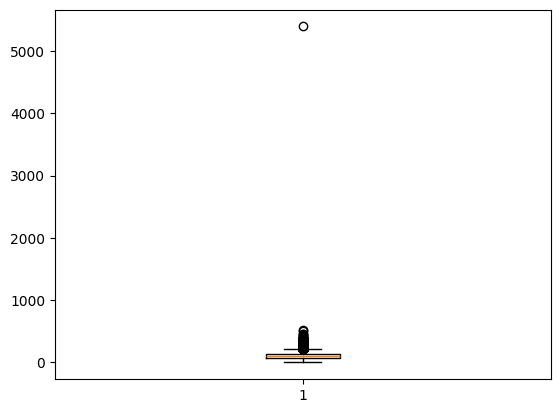

In [21]:
#There exsists an error at greater at 5000 in the adr column
plt.boxplot(df['adr'])
plt.show()

In [22]:
#Checking %age of cancelled reservations

cancelled_prec = df["is_canceled"].value_counts(normalize=True)
cancelled_prec

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

<BarContainer object of 2 artists>

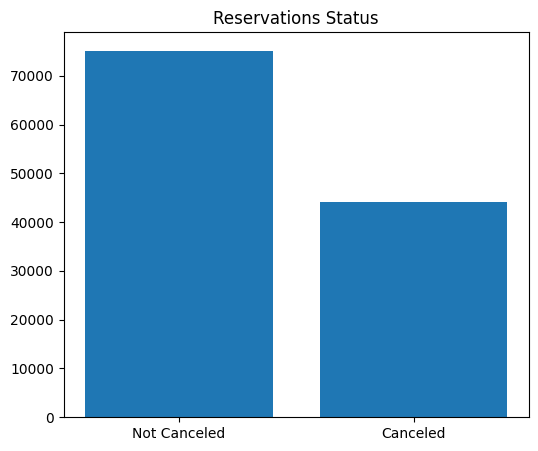

In [23]:
plt.figure(figsize=(6,5))
plt.title("Reservations Status")
plt.bar(["Not Canceled" , "Canceled"],df["is_canceled"].value_counts())

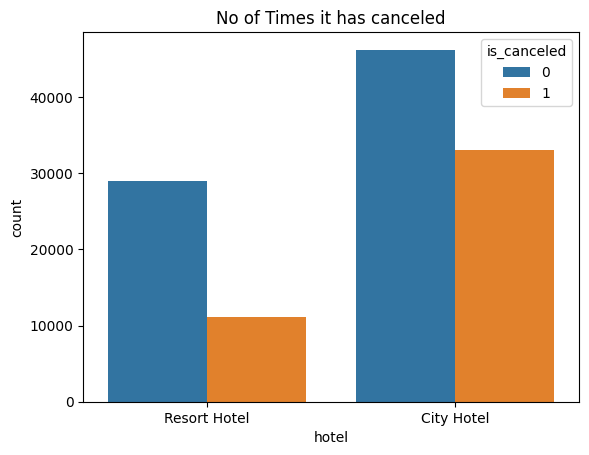

In [25]:
d1 = sns.countplot(x="hotel" , hue = "is_canceled" , data=df)
plt.title("No of Times it has canceled")
plt.show()

In [37]:
resort_hotel = df[df["hotel"]=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [38]:
city_hotel = df[df["hotel"]=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [44]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

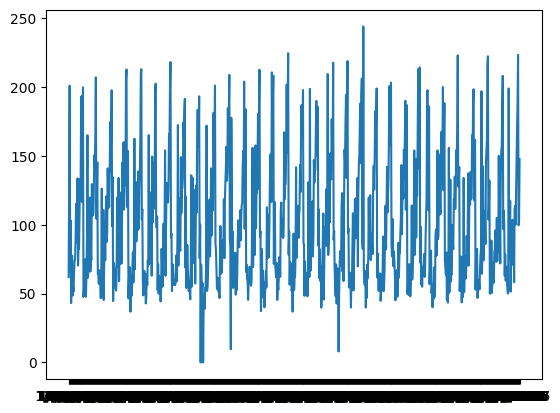

In [46]:
plt.plot(resort_hotel.index,resort_hotel['adr'],label="Resort Hotel")


In [ ]:
df["month"] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax = sns.countplot(x='month',hue='is_canceled',data=df)

In [50]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]

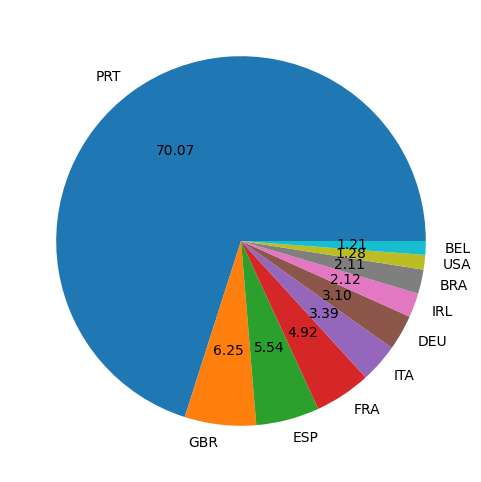

In [53]:
plt.figure(figsize=(6,6))
plt.pie(top_10_country,autopct='%.2f',labels = top_10_country.index)
plt.show()